In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy as sp
import statsmodels
import os
import statsmodels.formula.api as smf
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Any results you write to the current directory are saved as output.
import warnings
warnings.filterwarnings("ignore")


In [316]:
df19 = pd.read_csv('/Users/lunatesuncar/Downloads/song_data.csv')

In [317]:
df19i = pd.read_csv('/Users/lunatesuncar/Downloads/song_info.csv')

In [318]:
df19.head(50)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.4740
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.3700
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.3240
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.1980
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.5740
5,Bring Me To Life,80,235893,0.008950,0.316,0.945,0.000002,4,0.3960,-3.169,0,0.1240,189.931,4,0.3200
6,Last Resort,81,199893,0.000504,0.581,0.887,0.001110,4,0.2680,-3.659,0,0.0624,90.578,4,0.7240
7,Are You Gonna Be My Girl,76,213800,0.001480,0.613,0.953,0.000582,2,0.1520,-3.435,1,0.0855,105.046,4,0.5370
8,Mr. Brightside,80,222586,0.001080,0.330,0.936,0.000000,1,0.0926,-3.660,1,0.0917,148.112,4,0.2340
9,Sex on Fire,81,203346,0.001720,0.542,0.905,0.010400,9,0.1360,-5.653,1,0.0540,153.398,4,0.3740


In [319]:
print(df19.head(5))
df19.info()
df19.describe()

                    song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4      

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [320]:
df19i.head()

,song_name,artist_name,album_names,playlist
0,Boulevard of Broken Dreams,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
1,In The End,Linkin Park,Hybrid Theory,00s Rock Anthems
2,Seven Nation Army,The White Stripes,Elephant,00s Rock Anthems
3,By The Way,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems
4,How You Remind Me,Nickelback,Silver Side Up,00s Rock Anthems


In [321]:
print(df19i.head(5))
df19i.info()
df19i.describe()

                    song_name            artist_name  \
0  Boulevard of Broken Dreams              Green Day   
1                  In The End            Linkin Park   
2           Seven Nation Army      The White Stripes   
3                  By The Way  Red Hot Chili Peppers   
4           How You Remind Me             Nickelback   

                          album_names          playlist  
0  Greatest Hits: God's Favorite Band  00s Rock Anthems  
1                       Hybrid Theory  00s Rock Anthems  
2                            Elephant  00s Rock Anthems  
3         By The Way (Deluxe Version)  00s Rock Anthems  
4                      Silver Side Up  00s Rock Anthems  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   song_name    18835 non-null  object
 1   artist_name  18835 non-null  object
 2   album_names  18835 non-null  object
 3

,song_name,artist_name,album_names,playlist
count,18835,18835,18835,18835
unique,13070,7564,12014,300
top,Better,Kanye West,Greatest Hits,Acoustic Hits
freq,21,82,66,100


In [322]:
df19.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [323]:
df19i.isnull().sum()

song_name      0
artist_name    0
album_names    0
playlist       0
dtype: int64

In [324]:
song_pop = df19['song_popularity'] >= 95

In [325]:
df19[song_pop]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
61,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",98,212500,0.1530,0.841,0.798,0.000003,1,0.0618,-4.206,0,0.2290,95.948,4,0.591
85,BEBE,95,217822,0.1720,0.635,0.902,0.000000,0,0.1250,-3.559,1,0.1090,102.063,4,0.286
86,I Like It,95,253390,0.0990,0.816,0.726,0.000000,5,0.3720,-3.998,0,0.1290,136.048,4,0.650
1229,I Love It (& Lil Pump),99,127946,0.0114,0.901,0.522,0.000000,2,0.2590,-8.304,1,0.3300,104.053,4,0.329
1230,Falling Down,97,196400,0.0175,0.669,0.574,0.002940,4,0.1460,-6.442,0,0.0286,120.013,4,0.273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17815,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",98,212500,0.1530,0.841,0.798,0.000003,1,0.0618,-4.206,0,0.2290,95.948,4,0.591
17825,BEBE,95,217822,0.1720,0.635,0.902,0.000000,0,0.1250,-3.559,1,0.1090,102.063,4,0.286
17842,I Like It,95,253390,0.0990,0.816,0.726,0.000000,5,0.3720,-3.998,0,0.1290,136.048,4,0.650
17926,Promises (with Sam Smith),98,213309,0.0119,0.781,0.768,0.000005,11,0.3250,-5.991,1,0.0394,123.070,4,0.486


In [326]:
df192=df19.copy()

In [327]:
df19i2 = df19i.copy()

In [328]:
mean = df192['song_popularity'].mean()

In [329]:
mean

52.99187682505973

In [330]:
df192.song_duration_ms= df192.song_duration_ms.astype(float)
df192.time_signature= df192.time_signature.astype(float)
df192.audio_mode= df192.audio_mode.astype(float)

In [331]:
df192["popularity"]= [ 1 if i>=53 else 0 for i in df192.song_popularity ]
df192["popularity"].value_counts()

1    10516
0     8319
Name: popularity, dtype: int64

In [332]:
#popular songs' data
a=df192[df192["popularity"]==1]
a.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
count,10516.000000,1.051600e+04,10516.000000,10516.000000,10516.000000,10516.000000,10516.000000,10516.000000,10516.000000,10516.000000,10516.000000,10516.000000,10516.000000,10516.000000,10516.0
mean,68.579213,2.184250e+05,0.241322,0.642195,0.648403,0.053090,5.263884,0.174446,-7.126728,0.632560,0.102008,120.596589,3.966432,0.518573,1.0
std,10.846015,5.378093e+04,0.276651,0.153254,0.208881,0.185288,3.644011,0.139164,3.743718,0.482131,0.101449,28.307483,0.278770,0.238299,0.0
min,53.000000,5.001400e+04,0.000004,0.061700,0.001070,0.000000,0.000000,0.019600,-36.281000,0.000000,0.022400,46.591000,0.000000,0.027700,1.0
25%,60.000000,1.879018e+05,0.025100,0.543000,0.523000,0.000000,2.000000,0.092300,-8.466250,0.000000,0.038000,98.056000,4.000000,0.329000,1.0
50%,67.000000,2.119600e+05,0.125000,0.652000,0.678000,0.000004,5.000000,0.119000,-6.269000,1.000000,0.055850,119.973000,4.000000,0.512000,1.0
75%,75.000000,2.421860e+05,0.371000,0.754000,0.810000,0.000763,8.000000,0.208000,-4.749000,1.000000,0.120000,139.020750,4.000000,0.704000,1.0
max,100.000000,1.355938e+06,0.996000,0.980000,0.997000,0.997000,11.000000,0.981000,1.585000,1.000000,0.869000,216.115000,5.000000,0.984000,1.0


In [333]:
a.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
0,Boulevard of Broken Dreams,73,262333.0,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1.0,0.0294,167.060,4.0,0.474,1
1,In The End,66,216933.0,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0.0,0.0498,105.256,4.0,0.370,1
2,Seven Nation Army,76,231733.0,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1.0,0.0792,123.881,4.0,0.324,1
3,By The Way,74,216933.0,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1.0,0.1070,122.444,4.0,0.198,1
4,How You Remind Me,56,223826.0,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1.0,0.0313,172.011,4.0,0.574,1


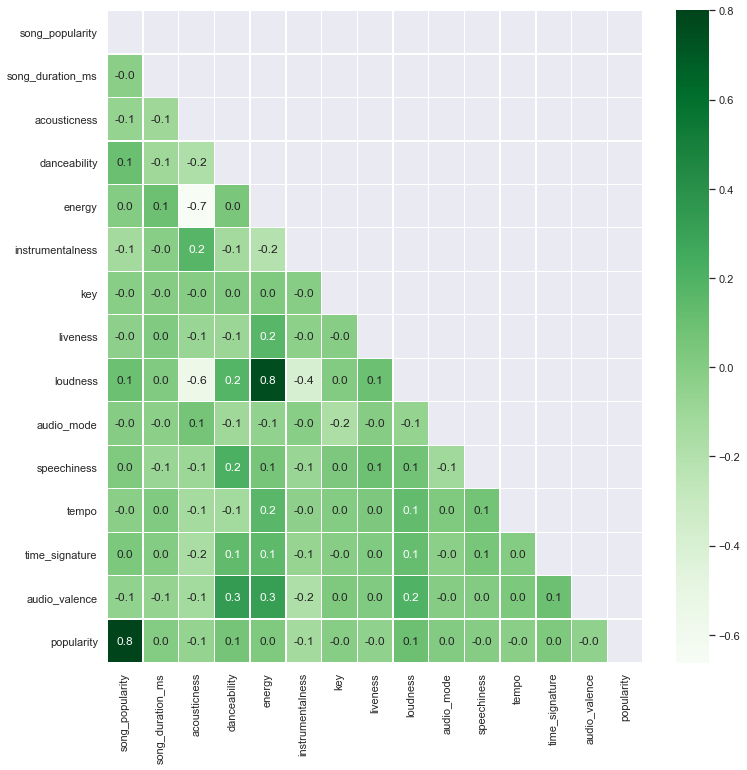

In [334]:
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(df192.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df192.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Greens",mask=mask)
plt.show() 

#Correlation between loudness and energy is 0.8 which is strong and correlation between loudness and accusticness is 0.6 which is moderate. Except two of them all the correlations are quite low. When we compare the correlation between song_popularity and all other features, we don't see a strong correlation (a linear relationship) that gives us a clear information about popularity. Accusticness,danceability and loudness seems to have correlation with popularity feature(0.10) and istrumentalness has 0.20.

In [335]:
def bar_plot(variable):
    
    var=df192[variable]
    var_value= var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_value.index,var_value,color="green")
    plt.xticks(var_value.index,var_value.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,var_value))

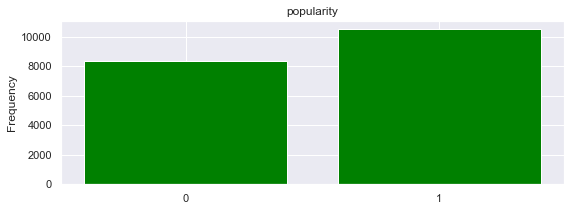

popularity:
1    10516
0     8319
Name: popularity, dtype: int64


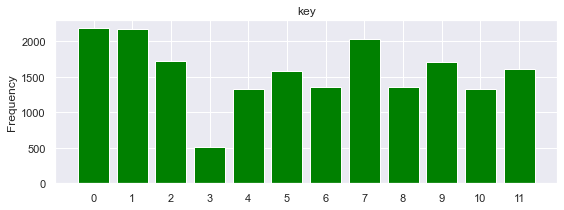

key:
0     2182
1     2164
7     2032
2     1715
9     1698
11    1600
5     1574
6     1351
8     1349
10    1331
4     1327
3      512
Name: key, dtype: int64


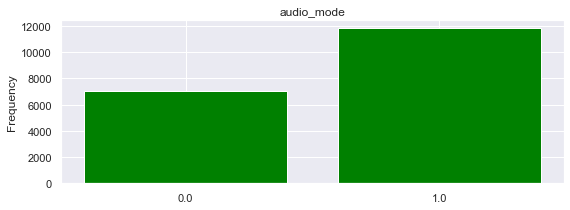

audio_mode:
1.0    11831
0.0     7004
Name: audio_mode, dtype: int64


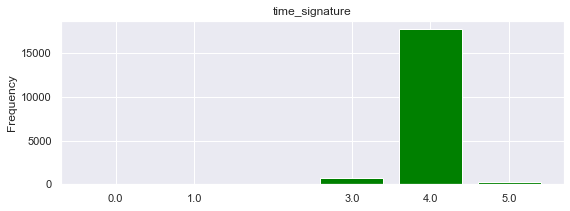

time_signature:
4.0    17754
3.0      772
5.0      233
1.0       73
0.0        3
Name: time_signature, dtype: int64


In [336]:
category1 = ["popularity","key","audio_mode","time_signature"]
for c in category1:
    bar_plot(c)

In [337]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [338]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [339]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

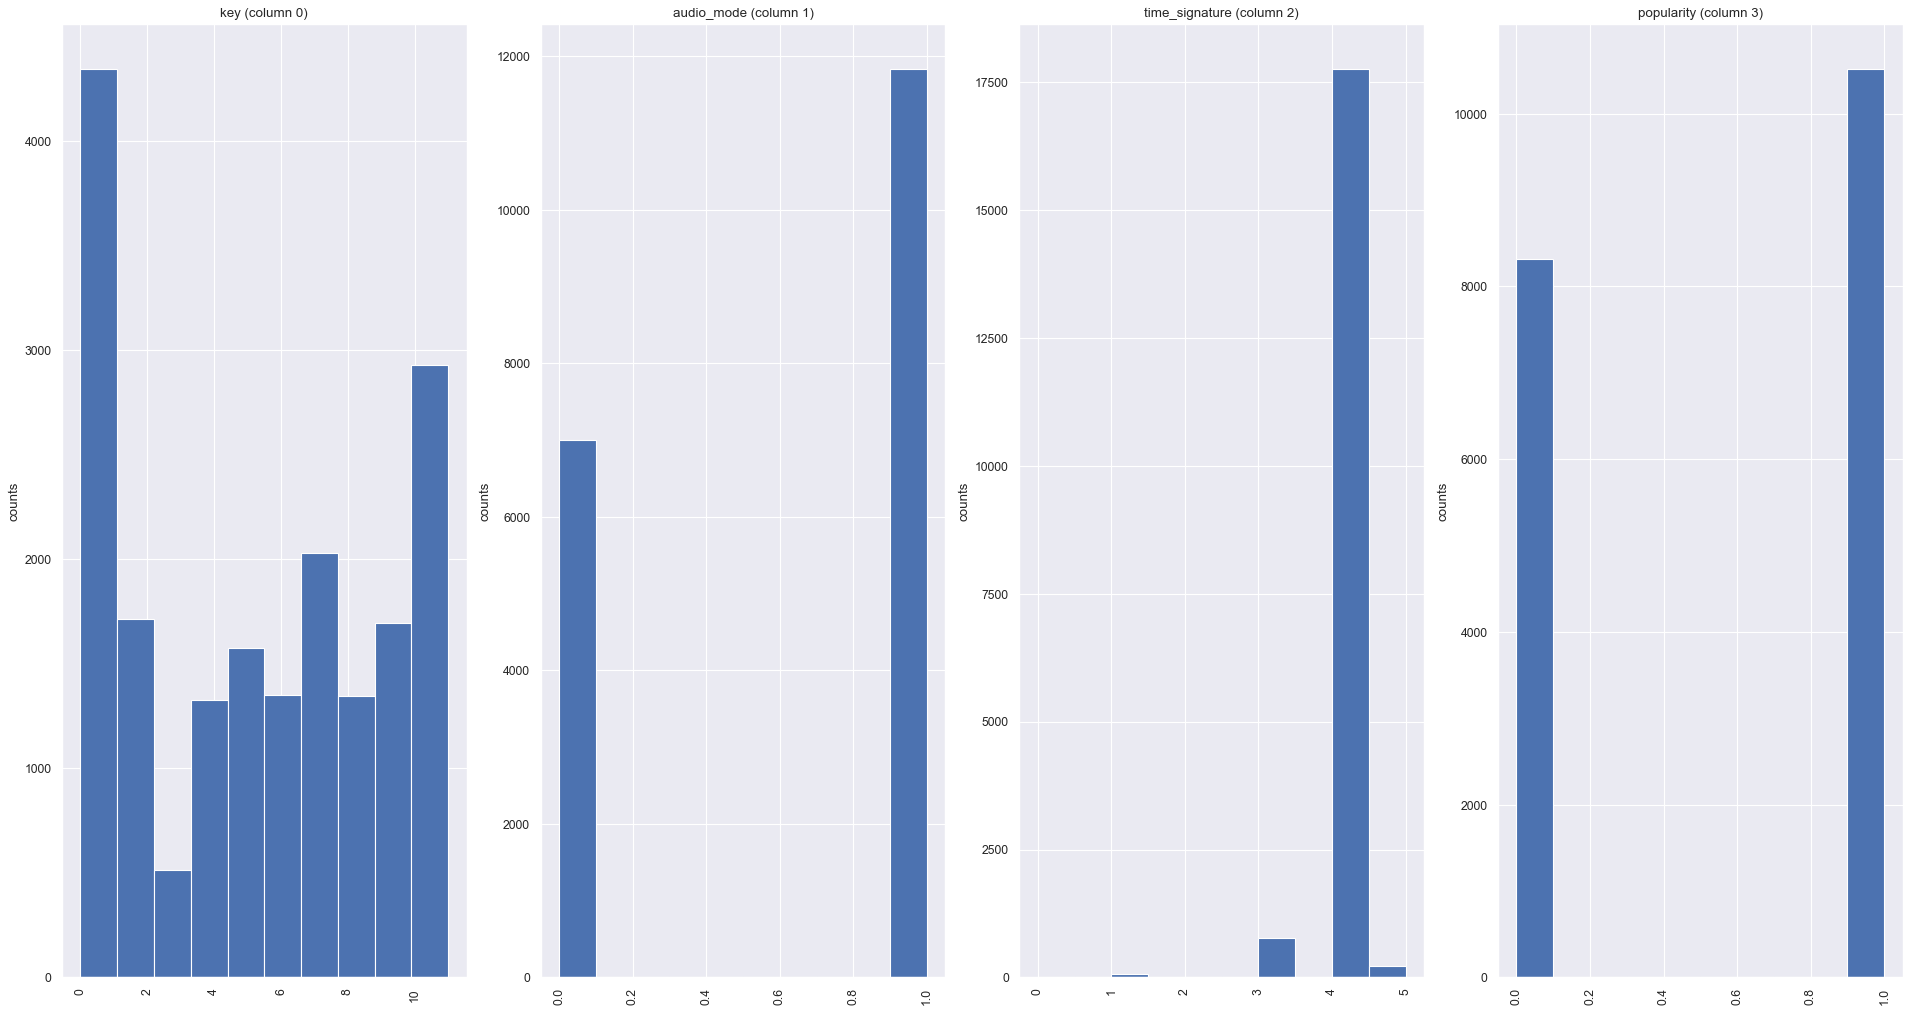

In [340]:
plotPerColumnDistribution(df192, 10, 5)

In [341]:
plotPerColumnDistribution(df19i2, 10, 5)

<Figure size 2400x512 with 0 Axes>

In [342]:
a.sort_values('song_popularity', ascending=False).head(30)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
7636,Happier,100,214289.0,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1.0,0.0452,100.015,4.0,0.671,1
17638,Happier,100,214289.0,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1.0,0.0452,100.015,4.0,0.671,1
16497,Happier,100,214289.0,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1.0,0.0452,100.015,4.0,0.671,1
7568,Happier,100,214289.0,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1.0,0.0452,100.015,4.0,0.671,1
17590,Happier,100,214289.0,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1.0,0.0452,100.015,4.0,0.671,1
4299,Happier,100,214289.0,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1.0,0.0452,100.015,4.0,0.671,1
11665,Happier,100,214289.0,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1.0,0.0452,100.015,4.0,0.671,1
11697,Happier,100,214289.0,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1.0,0.0452,100.015,4.0,0.671,1
15091,Happier,100,214289.0,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1.0,0.0452,100.015,4.0,0.671,1
5593,Happier,100,214289.0,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1.0,0.0452,100.015,4.0,0.671,1


In [343]:
a.sort_values('song_popularity', ascending=False).tail(50)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
17573,Sanctified,53,289626.0,0.075400,0.739,0.520,0.000000,9,0.3820,-6.301,1.0,0.0679,126.041,4.0,0.247,1
1500,Adore - Piano Unplugged,53,197573.0,0.739000,0.571,0.313,0.000000,0,0.1130,-9.833,1.0,0.0657,64.531,4.0,0.163,1
1517,Save My Life - Radio Edit,53,217973.0,0.778000,0.583,0.235,0.000000,6,0.1870,-10.121,1.0,0.0287,137.829,4.0,0.368,1
17575,Rage the Night Away,53,285000.0,0.004430,0.696,0.857,0.004530,10,0.2070,-4.566,0.0,0.0427,128.006,4.0,0.196,1
11687,Grenade,53,212893.0,0.027000,0.627,0.883,0.172000,0,0.0917,-6.915,1.0,0.0810,124.000,4.0,0.479,1
10304,El Preso,53,293786.0,0.166000,0.620,0.766,0.003250,5,0.1250,-5.409,0.0,0.0376,106.165,4.0,0.816,1
4067,Whistle,53,156055.0,0.076000,0.951,0.731,0.000000,1,0.0530,-6.091,1.0,0.1020,100.022,4.0,0.781,1
1538,Rather Be with You - Acoustic,53,199704.0,0.817000,0.579,0.256,0.000000,11,0.1340,-8.306,0.0,0.0384,109.901,4.0,0.258,1
1546,Love And Happiness,53,278146.0,0.026900,0.884,0.469,0.001110,1,0.0730,-9.852,0.0,0.0372,94.345,4.0,0.897,1
18285,Almost Like Praying (feat. Artists for Puerto ...,53,200457.0,0.019800,0.471,0.791,0.000000,5,0.2320,-3.373,0.0,0.2380,188.360,4.0,0.507,1


In [344]:
df192.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  float64
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  float64
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  float64
 14  audio_valence     18835 non-null  float64
 15  popularity        18835 non-null  int64  
dtypes: float64(12), int64(3), object(1)
memo

In [345]:
df192.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967,0.558322
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632,0.496600
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000,0.000000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000,1.000000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000,1.000000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000,1.000000


In [346]:
a = df192 ['popularity'].values
b = df192 ['song_popularity'].values
c = df192 ['danceability'].values
d = df192 ['energy'].values
e = df192 ['tempo'].values
f = df192 ['time_signature'].values

In [347]:
sns.set(rc={'figure.figsize': (16,3)})

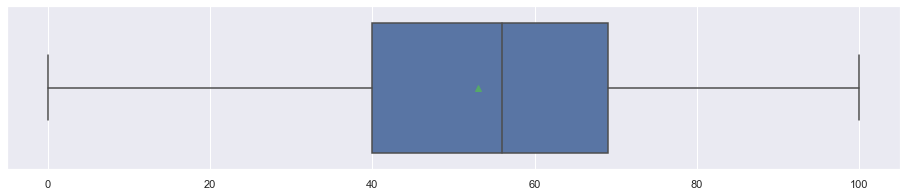

In [348]:
sns.boxplot(b, showmeans=True)

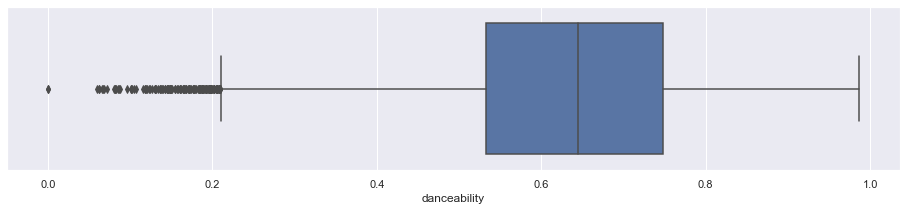

In [349]:
sns.boxplot(df192['danceability'])

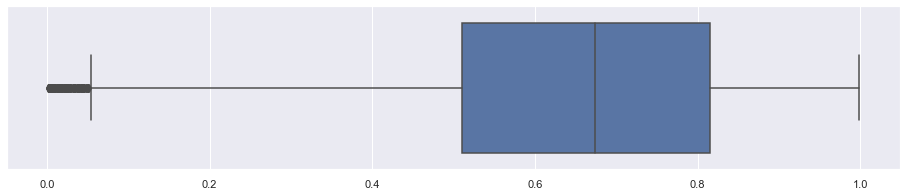

In [350]:
sns.boxplot(d)

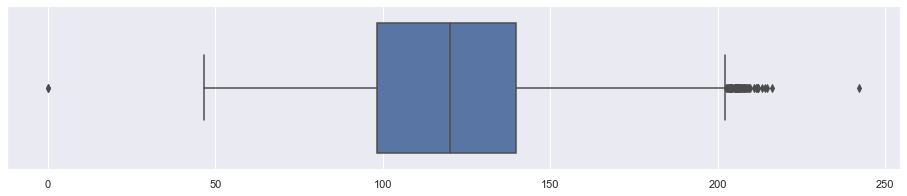

In [351]:
sns.boxplot(e)

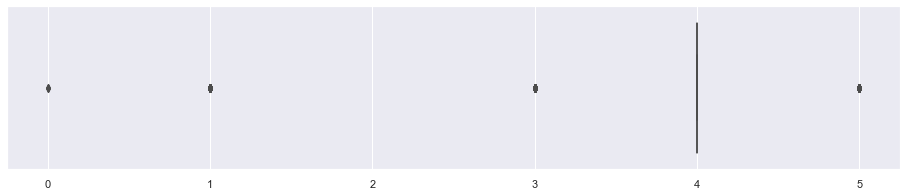

In [352]:
sns.boxplot(f)

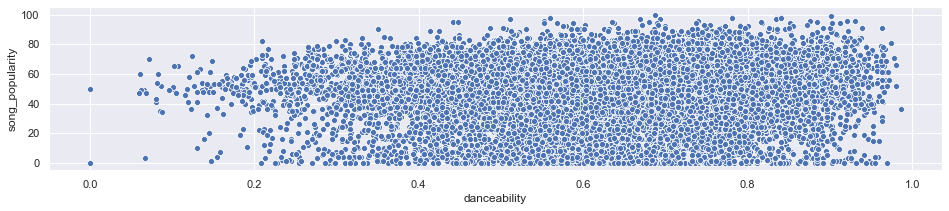

In [353]:
ax = sns.scatterplot(x = 'danceability', y = 'song_popularity', data = df192)

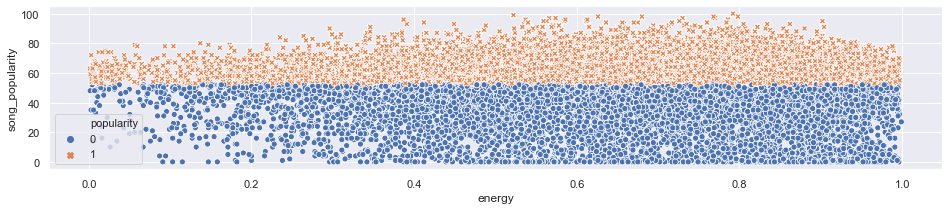

In [354]:
ax = sns.scatterplot(x = 'energy', y = 'song_popularity', data = df192, hue = 'popularity', style = 'popularity') size = 'Revenue', sizes = (20, 200),  palette = ["green", "red", "blue"] )

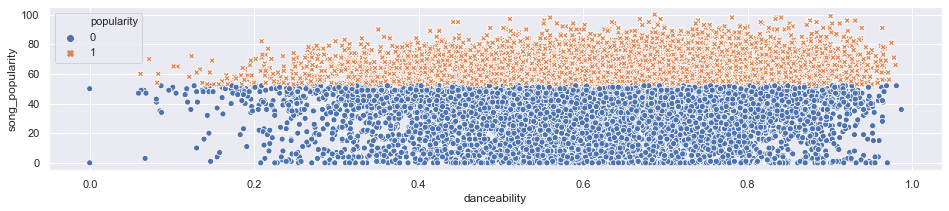

In [355]:
ax = sns.scatterplot(x = 'danceability', y = 'song_popularity', data = df192, hue = 'popularity', style = 'popularity', ci = False)

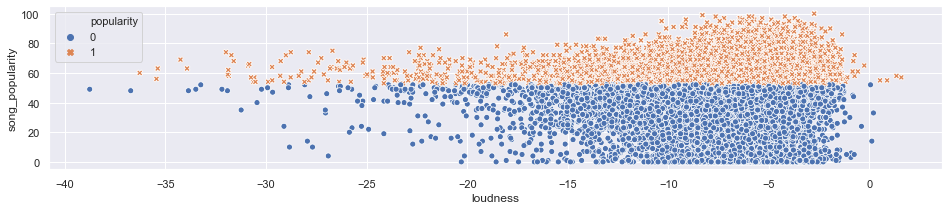

In [374]:
ax = sns.scatterplot(x = 'loudness', y = 'song_popularity', data = df192, hue = 'popularity', style = 'popularity', ci = False)

In [375]:
def statsmodels_train_test_split(df, stratify=None, **kwargs):

    if stratify is None:
        y, X = df.iloc[:,0], df.drop(columns=df.columns[0])
        X_train, X_test, y_train, y_test = train_test_split(X,y, **kwargs)
    else:
        y, X = stratify, df.drop(columns = stratify.name)
        X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, **kwargs)
    
    return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)

In [376]:
train, test = statsmodels_train_test_split(df192)

In [377]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14126 entries, 278 to 17009
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   14126 non-null  int64  
 1   song_duration_ms  14126 non-null  float64
 2   acousticness      14126 non-null  float64
 3   danceability      14126 non-null  float64
 4   energy            14126 non-null  float64
 5   instrumentalness  14126 non-null  float64
 6   key               14126 non-null  int64  
 7   liveness          14126 non-null  float64
 8   loudness          14126 non-null  float64
 9   audio_mode        14126 non-null  float64
 10  speechiness       14126 non-null  float64
 11  tempo             14126 non-null  float64
 12  time_signature    14126 non-null  float64
 13  audio_valence     14126 non-null  float64
 14  popularity        14126 non-null  int64  
 15  song_name         14126 non-null  object 
dtypes: float64(12), int64(3), object(1)
me

In [378]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4709 entries, 4345 to 7029
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   4709 non-null   int64  
 1   song_duration_ms  4709 non-null   float64
 2   acousticness      4709 non-null   float64
 3   danceability      4709 non-null   float64
 4   energy            4709 non-null   float64
 5   instrumentalness  4709 non-null   float64
 6   key               4709 non-null   int64  
 7   liveness          4709 non-null   float64
 8   loudness          4709 non-null   float64
 9   audio_mode        4709 non-null   float64
 10  speechiness       4709 non-null   float64
 11  tempo             4709 non-null   float64
 12  time_signature    4709 non-null   float64
 13  audio_valence     4709 non-null   float64
 14  popularity        4709 non-null   int64  
 15  song_name         4709 non-null   object 
dtypes: float64(12), int64(3), object(1)
mem

In [379]:
fitted_model = smf.logit(formula='popularity ~ audio_valence + time_signature + tempo + acousticness + audio_mode + danceability + speechiness  + energy + instrumentalness + key + liveness + loudness', data=train).fit()

Optimization terminated successfully.
         Current function value: 0.670025
         Iterations 5


In [380]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             popularity   No. Observations:                14126
Model:                          Logit   Df Residuals:                    14113
Method:                           MLE   Df Model:                           12
Date:                Fri, 25 Sep 2020   Pseudo R-squ.:                 0.02524
Time:                        13:35:49   Log-Likelihood:                -9464.8
converged:                       True   LL-Null:                       -9709.9
Covariance Type:            nonrobust   LLR p-value:                 2.641e-97
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.0945      0.305      3.583      0.000       0.496       1.693
audio_valence       -0.6328      0.083     -7.620      0.000      -0.796      -0.470
time_signature       0.1090      0.061      1.784      0.074      -0.011       0.229
tempo               -0.0009      0.001     -1.429      0.153      -0.002       0.000
acousticness        -0.3889      0.083     -4.659      0.000      -0.552      -0.225
audio_mode           0.0775      0.037      2.117      0.034       0.006       0.149
danceability         0.6188      0.132      4.684      0.000       0.360       0.878
speechiness         -0.3465      0.172     -2.016      0.044      -0.683      -0.010
energy              -0.8437      0.155     -5.440      0.000      -1.148      -0.540
instrumentalness    -1.0029      0.088    -11.354      0.000      -1.176      -0.830
key                 -0.0036      0.005     -0.748      0.454      -0.013       0.006
liveness            -0.5620      0.122     -4.612      0.000      -0.801      -0.323
loudness             0.0577      0.008      7.396      0.000       0.042       0.073
====================================================================================
"""

In [381]:
fitted_model = smf.logit(formula='popularity ~ audio_valence + time_signature + tempo + acousticness + danceability + speechiness  + energy + instrumentalness + key + liveness + loudness', data=train).fit()

Optimization terminated successfully.
         Current function value: 0.670183
         Iterations 5


In [382]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             popularity   No. Observations:                14126
Model:                          Logit   Df Residuals:                    14114
Method:                           MLE   Df Model:                           11
Date:                Fri, 25 Sep 2020   Pseudo R-squ.:                 0.02501
Time:                        13:35:52   Log-Likelihood:                -9467.0
converged:                       True   LL-Null:                       -9709.9
Covariance Type:            nonrobust   LLR p-value:                 3.479e-97
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1644      0.304      3.835      0.000       0.569       1.760
audio_valence       -0.6267      0.083     -7.553      0.000      -0.789      -0.464
time_signature       0.1084      0.061      1.773      0.076      -0.011       0.228
tempo               -0.0009      0.001     -1.374      0.169      -0.002       0.000
acousticness        -0.3866      0.083     -4.633      0.000      -0.550      -0.223
danceability         0.5965      0.132      4.531      0.000       0.338       0.855
speechiness         -0.3779      0.171     -2.208      0.027      -0.713      -0.042
energy              -0.8476      0.155     -5.467      0.000      -1.152      -0.544
instrumentalness    -1.0115      0.088    -11.465      0.000      -1.184      -0.839
key                 -0.0054      0.005     -1.125      0.260      -0.015       0.004
liveness            -0.5598      0.122     -4.595      0.000      -0.799      -0.321
loudness             0.0574      0.008      7.354      0.000       0.042       0.073
====================================================================================
"""

In [383]:
fitted_model = smf.logit(formula='popularity ~ audio_valence + time_signature + acousticness + danceability + speechiness  + energy + instrumentalness + key + liveness + loudness', data=train).fit()

Optimization terminated successfully.
         Current function value: 0.670250
         Iterations 5


In [384]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             popularity   No. Observations:                14126
Model:                          Logit   Df Residuals:                    14115
Method:                           MLE   Df Model:                           10
Date:                Fri, 25 Sep 2020   Pseudo R-squ.:                 0.02492
Time:                        13:35:54   Log-Likelihood:                -9468.0
converged:                       True   LL-Null:                       -9709.9
Covariance Type:            nonrobust   LLR p-value:                 1.230e-97
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.0385      0.290      3.586      0.000       0.471       1.606
audio_valence       -0.6334      0.083     -7.646      0.000      -0.796      -0.471
time_signature       0.1103      0.061      1.805      0.071      -0.009       0.230
acousticness        -0.3791      0.083     -4.553      0.000      -0.542      -0.216
danceability         0.6262      0.130      4.822      0.000       0.372       0.881
speechiness         -0.3994      0.170     -2.343      0.019      -0.733      -0.065
energy              -0.8522      0.155     -5.498      0.000      -1.156      -0.548
instrumentalness    -1.0124      0.088    -11.474      0.000      -1.185      -0.839
key                 -0.0053      0.005     -1.121      0.262      -0.015       0.004
liveness            -0.5567      0.122     -4.570      0.000      -0.795      -0.318
loudness             0.0570      0.008      7.314      0.000       0.042       0.072
====================================================================================
"""

In [385]:
fitted_model = smf.logit(formula='popularity ~ audio_valence + time_signature + acousticness + danceability  + energy + instrumentalness + key + liveness + loudness', data=train).fit()

Optimization terminated successfully.
         Current function value: 0.670444
         Iterations 5


In [386]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             popularity   No. Observations:                14126
Model:                          Logit   Df Residuals:                    14116
Method:                           MLE   Df Model:                            9
Date:                Fri, 25 Sep 2020   Pseudo R-squ.:                 0.02463
Time:                        13:35:56   Log-Likelihood:                -9470.7
converged:                       True   LL-Null:                       -9709.9
Covariance Type:            nonrobust   LLR p-value:                 2.430e-97
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.0551      0.289      3.648      0.000       0.488       1.622
audio_valence       -0.6136      0.082     -7.449      0.000      -0.775      -0.452
time_signature       0.1087      0.061      1.780      0.075      -0.011       0.228
acousticness        -0.3769      0.083     -4.529      0.000      -0.540      -0.214
danceability         0.5608      0.127      4.421      0.000       0.312       0.809
energy              -0.8674      0.155     -5.602      0.000      -1.171      -0.564
instrumentalness    -0.9996      0.088    -11.362      0.000      -1.172      -0.827
key                 -0.0058      0.005     -1.229      0.219      -0.015       0.003
liveness            -0.5871      0.121     -4.848      0.000      -0.824      -0.350
loudness             0.0575      0.008      7.378      0.000       0.042       0.073
====================================================================================
"""

In [387]:
fitted_model = smf.logit(formula='popularity ~ audio_valence + acousticness + danceability  + energy + instrumentalness + key + liveness + loudness', data=train).fit()

Optimization terminated successfully.
         Current function value: 0.670557
         Iterations 5


In [388]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             popularity   No. Observations:                14126
Model:                          Logit   Df Residuals:                    14117
Method:                           MLE   Df Model:                            8
Date:                Fri, 25 Sep 2020   Pseudo R-squ.:                 0.02447
Time:                        13:35:58   Log-Likelihood:                -9472.3
converged:                       True   LL-Null:                       -9709.9
Covariance Type:            nonrobust   LLR p-value:                 1.460e-97
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.4578      0.180      8.078      0.000       1.104       1.812
audio_valence       -0.6122      0.082     -7.434      0.000      -0.774      -0.451
acousticness        -0.3855      0.083     -4.640      0.000      -0.548      -0.223
danceability         0.5842      0.126      4.631      0.000       0.337       0.831
energy              -0.8490      0.154     -5.496      0.000      -1.152      -0.546
instrumentalness    -1.0035      0.088    -11.411      0.000      -1.176      -0.831
key                 -0.0060      0.005     -1.257      0.209      -0.015       0.003
liveness            -0.5883      0.121     -4.859      0.000      -0.826      -0.351
loudness             0.0570      0.008      7.318      0.000       0.042       0.072
====================================================================================
"""

In [389]:
y_pred_test = fitted_model.predict(test)
y_prediction_test = np.round(y_pred_test)
y_prediction_test

4345     1.0
7970     1.0
6278     1.0
15939    1.0
8854     1.0
        ... 
17722    1.0
18342    0.0
12945    1.0
4218     1.0
7029     1.0
Length: 4709, dtype: float64

In [390]:
accuracy_score(test['popularity'], y_prediction_test)

0.6041622425143343

In [391]:
confusion_matrix(test['popularity'], y_prediction_test)

array([[ 542, 1472],
       [ 392, 2303]])